In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

# Task 0
Data extraction: get the data from 3 tables & combine it into single `.csv` file.
After that read this file using pandas to create Dataframe.
So it will be all joined data in 1 dataframe. Quick check - should be 74818 rows in it.

In [4]:
with sqlite3.connect("../db.sqlite3") as connection:
    cursor = connection.cursor()
    cursor.execute('SELECT product.name AS name, product.price AS price, orderitem.quantity AS quantity, "order".datetime '
                   'FROM restaurant_orderitem AS orderitem '
                   'INNER JOIN restaurant_product AS product ON orderitem.product_id = product.id '
                   'INNER JOIN restaurant_order AS "order" ON orderitem.order_id = "order".id')
    rows = cursor.fetchall()
df = pd.DataFrame(rows, columns=["name", "price", "quantity", "datetime"])
df.to_csv("orders.csv", index=False)
df["datetime"] = pd.to_datetime(df["datetime"])

# Task 1
Get Top 10 most popular products in restaurant sold by Quantity.
Count how many times each product was sold and create a pie chart with percentage of popularity (by quantity) for top 10 of them.

Example:

![pie chart](../demo/pie.png)

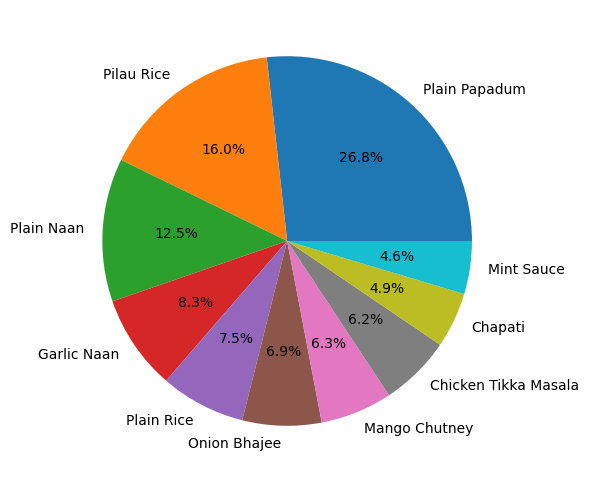

In [13]:
# most_popular_10 = df[["name", "quantity"]].groupby("name").sum().sort_values(by="quantity", ascending=False).head(10)
most_popular_10 = df.groupby("name")["quantity"].sum().nlargest(10)
most_popular_10.plot.pie(
    y="quantity",
    autopct='%1.1f%%',
    figsize=(6, 6),
)
plt.legend().remove()
plt.ylabel("")
plt.show()

# Task 2
Calculate `Item Price` (Product Price * Quantity) for each Order Item in dataframe.
And Make the same Top 10 pie chart, but this time by `Item Price`. So this chart should describe not the most popular products by quantity, but which products (top 10) make the most money for restaurant. It should be also with percentage.

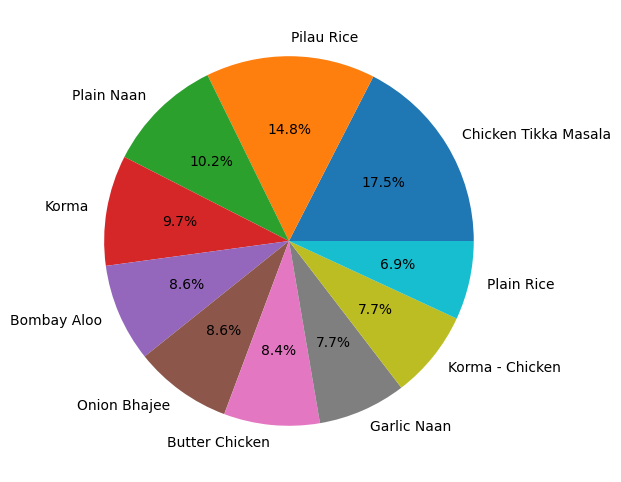

In [16]:
df["item_price"] = df["price"] * df["quantity"]
most_popular_10 = df.groupby("name")["item_price"].sum().nlargest(10)
most_popular_10.plot.pie(
    y="item_price",
    autopct='%1.1f%%',
    figsize=(6, 6),
)
plt.legend().remove()
plt.ylabel("")
plt.show()

# Task 3
Calculate `Order Hour` based on `Order Datetime`, which will tell about the specific our the order was created (from 0 to 23). Using `Order Hour` create a bar chart, which will tell the total restaurant income based on the hour order was created. So on x-axis - it will be values from 0 to 23 (hours), on y-axis - it will be the total sum of order prices, which were sold on that hour.

Example:

![bar chart](../demo/bar.png)

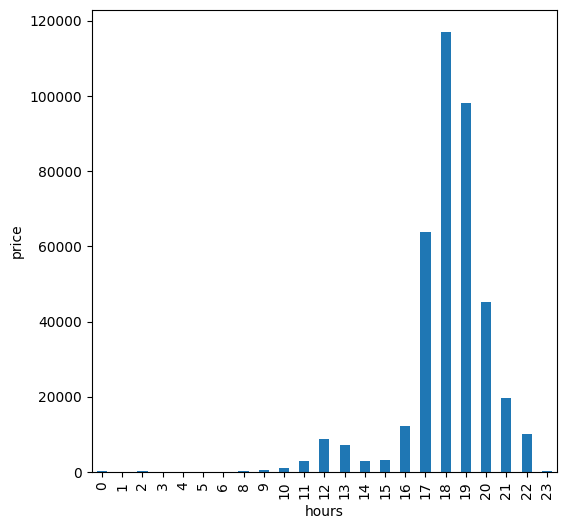

In [72]:
df["datetime"] = pd.to_datetime(df["datetime"])
df["hour"] = df["datetime"].dt.hour
price_per_hour = df.groupby("hour")["price"].sum()
price_per_hour.plot(kind="bar", figsize=(6, 6))
plt.xlabel("hours")
plt.ylabel("price")
plt.show()

# Task 4
Make similar bar chart, but right now with `Order Day Of The Week` (from Monday to Sunday), and also analyze total restaurant income by each day of the week.

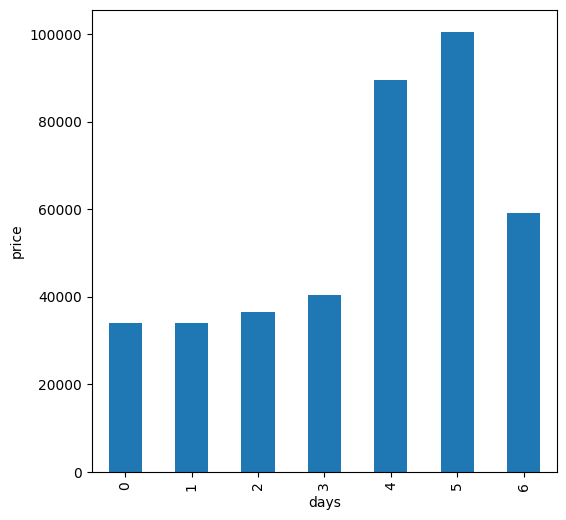

In [79]:
df["day_of_the_week"] = df["datetime"].dt.dayofweek
price_per_day = df.groupby("day_of_the_week")["price"].sum()
price_per_day.plot(kind="bar", figsize=(6, 6))
plt.xlabel("days")
plt.ylabel("price")
plt.show()